# Gini Coefficient in POS with staking derivatives

In [6]:
from ideal_functions import loop
from utils import gini_coefficient
import numpy as np
import seaborn as sns
import progressbar
from multiprocessing import Pool, Array

## Compute the gini coefficient at last period

The values of lambda_slash and lambda_borrow are going to vary

### Constants for the simulation

In [7]:
lambda_stake = 50
lambda_collateral = .75
size = 100
T_max = 100
iota = 0.1
epoch_time = 1

### Initialize calculus related variables

In [8]:
# Number of repetitions with same lambdas (>= 30)
repeat = 30
# Step size between two lambdas
step = .05
# lambdas
lambda_borrow = np.arange(step, 1, step)
lambda_slash = np.arange(step, 1, step)
# number of tested lambdas per parameter
number_of_lambdas = len(lambda_borrow)
# Empty list to store the results
gini_coefficient_list = np.zeros((number_of_lambdas, number_of_lambdas))

### Loop

In [9]:
def gini_coefficient_loop(indexes):
    global gini_coefficient_list
    lambda_borrow_index, lambda_slash_index = indexes
    for _ in range(repeat):
        stakes, loans, borrowing_array, phi = loop(lambda_stake, lambda_collateral, lambda_borrow[lambda_borrow_index], lambda_slash[lambda_slash_index], size, T_max, iota, epoch_time)
        gini_coefficient_list[lambda_borrow_index, lambda_slash_index] += gini_coefficient(stakes[-1])



In [10]:
# p = Pool(20)
# p.map(gini_coefficient_loop, [(i, j) for i in range(number_of_lambdas) for j in range(number_of_lambdas)])
# print('here')

# gini_coefficient_list /= repeat

indexes = [(i, j) for i in range(number_of_lambdas) for j in range(number_of_lambdas)]

for i, j in progressbar.progressbar(indexes):
    gini_coefficient_loop((i, j))
gini_coefficient_list /= repeat

100% (361 of 361) |######################| Elapsed Time: 0:01:54 Time:  0:01:54


<AxesSubplot:>

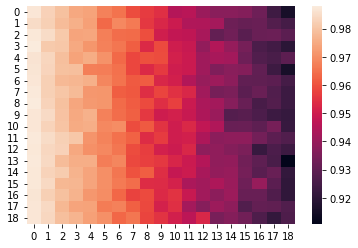

In [11]:
sns.heatmap(gini_coefficient_list)

In [12]:
import pandas as pd

In [13]:
df_coef = pd.DataFrame(gini_coefficient_list, index=lambda_borrow, columns=lambda_slash)

<AxesSubplot:>

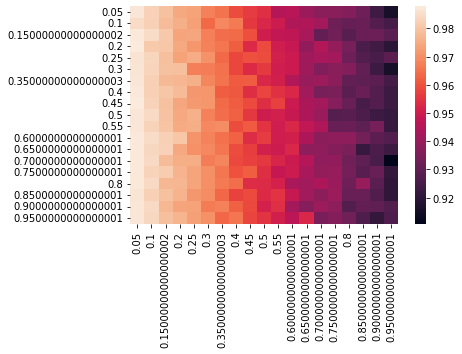

In [14]:
sns.heatmap(df_coef)